# Week 3: Charting Fundamentals

P. Schuster  
University of Michigan  
July 2018

In [21]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.subplot?

# Subplots

## Syntax

Matplotlib handles subplots in a single figure. Typical syntax:

    subplot(nrows, ncols, plot_number)

Set the rendering backend to the NPA backend.

The subplots are numbered from top to bottom and left to right.

<IPython.core.display.Javascript object>


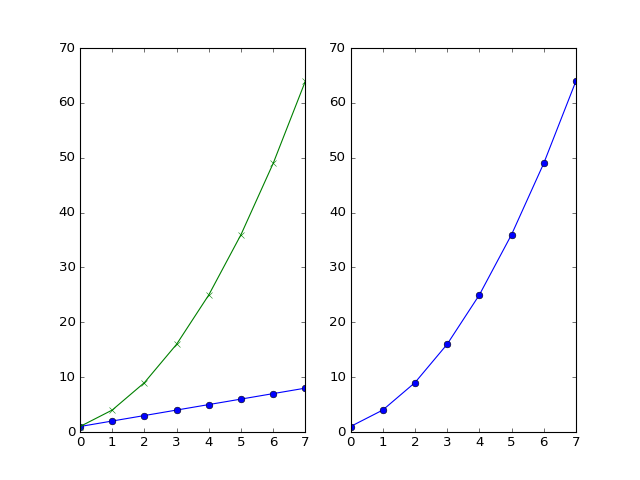

In [22]:
plt.figure()
plt.subplot(1,2,1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data,'-o')

In [23]:
exponential = linear_data**2

In [24]:
plt.subplot(1,2,2)
plt.plot(exponential,'-o')

Notice that it automatically modifies the axes above, it doesn't make a new figure. This is because of `%matplotlib notebook`.

I can add another line to the first subplot by selecting that subplot and then continuing to call `plt.plot`.

In [25]:
plt.subplot(1,2,1)
plt.plot(exponential,'-x')

## `sharex` and `sharey` parameters

If you want to have the same x- and y-axes limits, then you can make that happen.

<IPython.core.display.Javascript object>


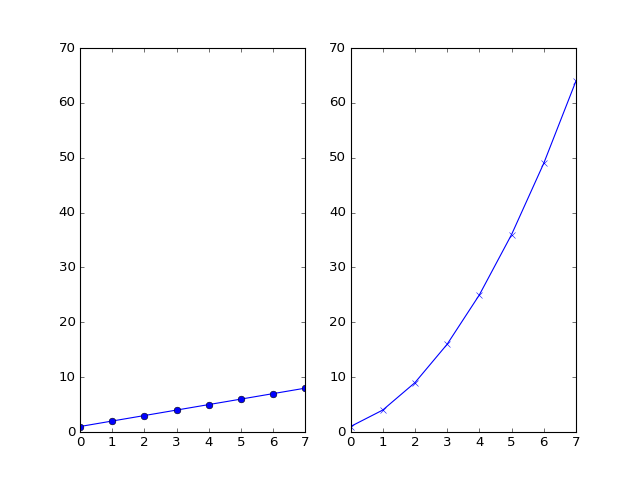

In [26]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data,'-o')
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential,'-x')

Note that we can only share axes when creating a plot. This is not something you can modify later. 

`plt.plot` will always call the most recent axes we've been using.

## Grids

If we want to produce a grid with all x- and y-ranges locked, we can do so like:

<IPython.core.display.Javascript object>


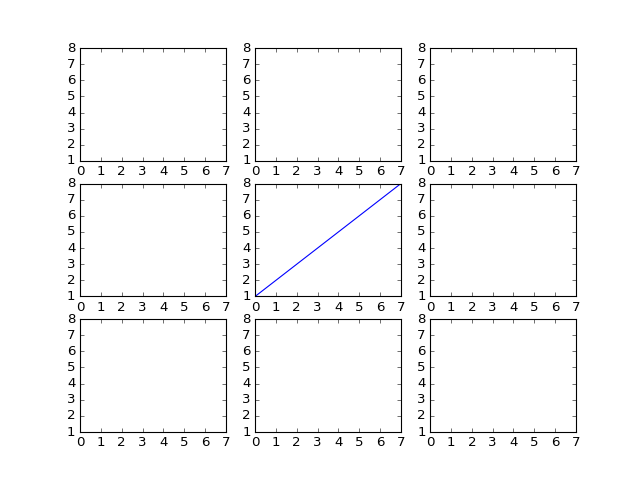

In [27]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,sharey=True)
ax5.plot(linear_data)

Note that when I first run this, it automaticaly turns off the axes labels throughout the figure. If you want to turn them back on you need to iterate through the axes objects:

In [28]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

This does not re-draw the figure. So you need to call that.

In [29]:
plt.gcf().canvas.draw()

# The histogram

This is a pretty fundamental data science chart.

## Sampling

Pick a number from the distribution. The more samples we get, the more we recreate the probability density function.

<IPython.core.display.Javascript object>


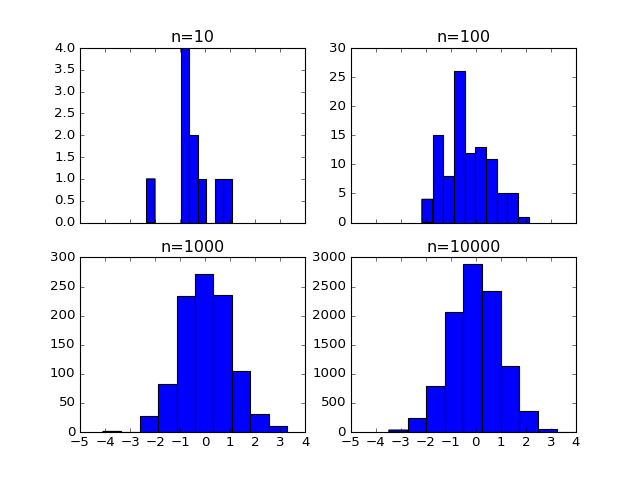

In [30]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

We used a shared x range, but the `x_bin_edges` are determined by the sample, thus the bar widths vary.

Try 100 bins.

<IPython.core.display.Javascript object>


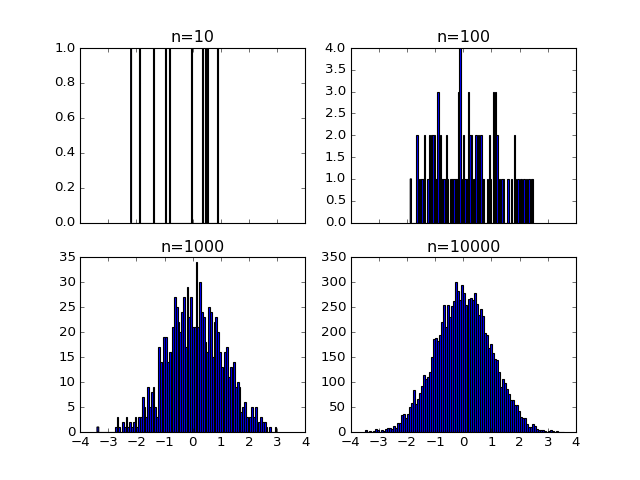

In [31]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

Now it is clear that the last histogram is the smoothest. 

# `GridSpec` layout

The GridSpec layout allows you to map axes over multiple cells in a grid.

<IPython.core.display.Javascript object>


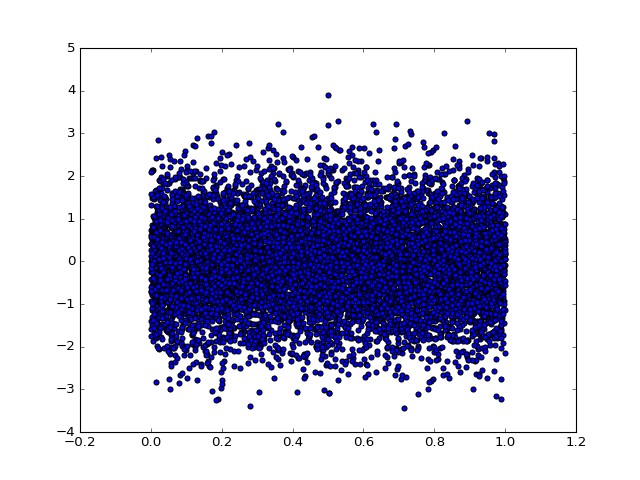

In [32]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

plt.scatter(X,Y)

This is not super useful, so let's look at different ways of representing the data.

<IPython.core.display.Javascript object>


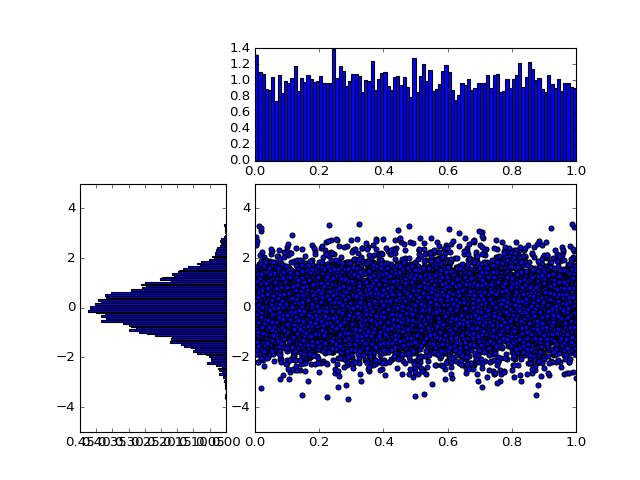

In [33]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0,1:])
side_histogram = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

In [34]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X,Y)
top_histogram.hist(X,bins=100)
s=side_histogram.hist(Y,bins=100,orientation='horizontal')

Since these are pdfs, we care only about the relative values.

Clear so that we don't have to do the grid spec all over again.

In [35]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal',normed=True)
side_histogram.invert_xaxis()

Set the range of the axes.

In [36]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim([0,1])
for ax in [side_histogram, lower_right]:
    ax.set_ylim([-5,5])

# The box plot

Sometimes called a box-and-whisker plot. Simulatenously shows for each values the minimum, maximum, and inter-quartile range. 

In [37]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size = 10000)
random_sample = np.random.random(size=10000)
gamma_sample  = np.random.gamma(2,size=10000)

df = pd.DataFrame({'normal':normal_sample,'random':random_sample,'gamma':gamma_sample})

df.head()

,gamma,normal,random
0,0.294771,1.346722,0.563099
1,1.438026,2.066208,0.661663
2,3.766305,0.797505,0.939109
3,0.544193,0.469703,0.754706
4,3.370968,0.278254,0.952430


Get a glimpse of the stats with `describe()`

In [38]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.995790,-0.003629,0.500324
std,1.426912,1.000755,0.287142
min,0.010103,-3.481217,0.000077
25%,0.961176,-0.675684,0.250561
50%,1.671559,-0.006451,0.505285
75%,2.668711,0.675978,0.745743
max,11.805778,3.926382,0.999930


In a box plot, the mean is plotted as a straight line. A box above represents the 50-70% data group, and another box represents the 25-50% data group.

<IPython.core.display.Javascript object>


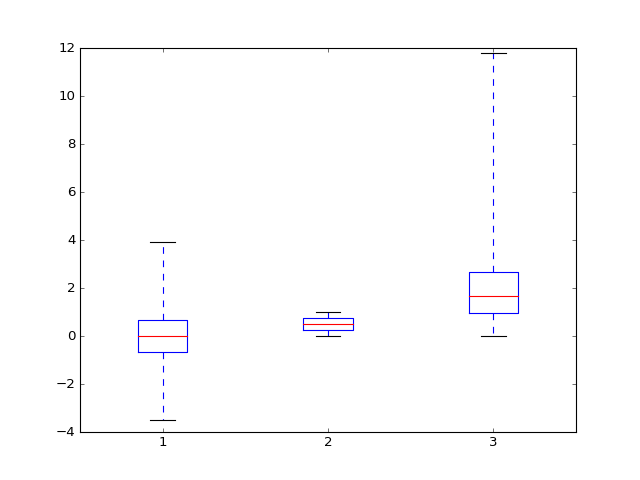

In [39]:
plt.figure()
_ = plt.boxplot(df['normal'],whis='range')

Set the output to an underscore. This is illegal, but can be used to stop Jupyter from printing a returned variable that we don't care about. 

In [40]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

You can see that the Gamma distribution has a very long quartile. Look at the Gamma distribution in a histogram.

<IPython.core.display.Javascript object>


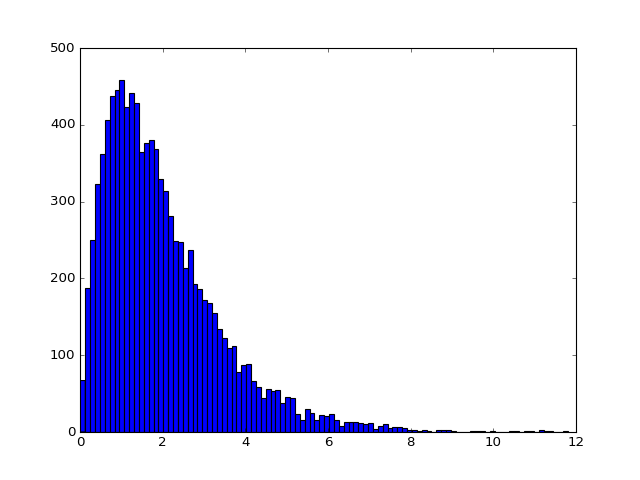

In [41]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

Add this to the box plot, as "inset axes." Use "axes grid."

<IPython.core.display.Javascript object>


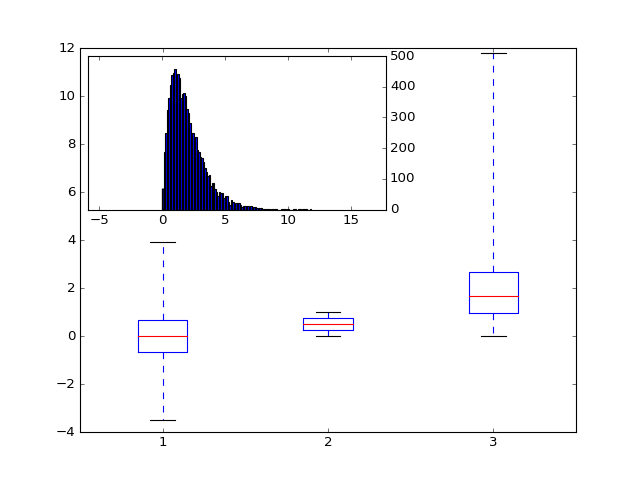

In [42]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

Fix the clash on the y-axes.

In [43]:
ax2.yaxis.tick_right()

What happens if you don't include `whis`?

<IPython.core.display.Javascript object>


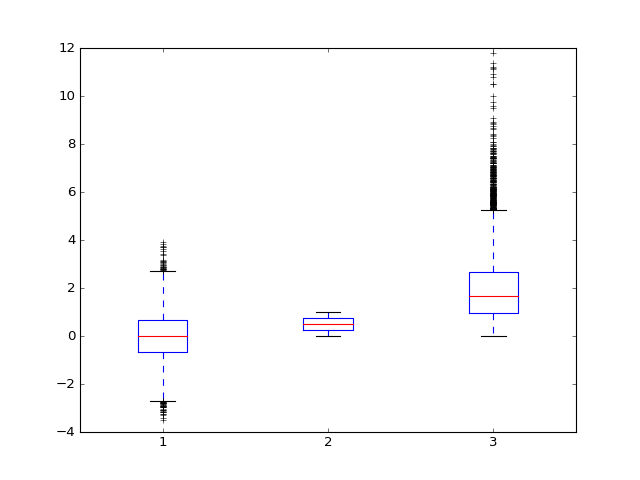

In [44]:
plt.figure()
_ = plt.boxplot([df['normal'],df['random'],df['gamma']])

# Heatmaps

Useful when used properly. Weather plots are a good example. 

They break down when there's no continuous relationship between dimensions.

<IPython.core.display.Javascript object>


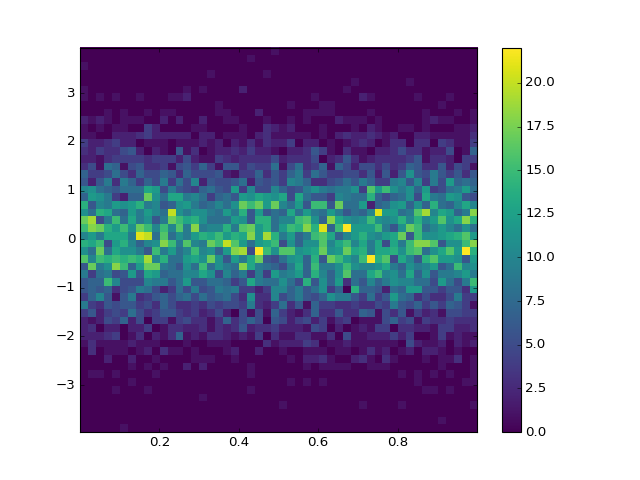

In [45]:
plt.figure()

Y = np.random.normal(loc=0.0,scale=1.0,size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X,Y,bins=50,cmap='viridis')
plt.colorbar()

Calling the colorbar actually leads to a lot of things: matplotlib generates the range of the colorbar, stores the current image, createst a new one with the colorbar on the side using GridSpec, and then draws it.

# Animation

The matplotlib Jupyter notebook backend provides some capability for animation. We will use the function `FuncAnimation`.

The backend renders the animation to the screen. 

The animation will either clear and redraw the axes, or return a list of objects that need to be redrawn.

In [46]:
import matplotlib.animation as animation

In [47]:
n = 100 # cutoff
x = np.random.randn(n)

Create a function that will do the plotting. `FuncAnimation` will call this every few seconds and pass in the frame.

In [48]:
def update(curr):
    # Is the current frame at the end of the list? If so, stop
    if curr == n: 
        a.event_source.stop()  # animation will be called `a`
    plt.cla()                  # clear axes
    bins = np.arange(-4,4,0.5) # specify bins so it's always the same
    
    plt.hist(x[:curr],bins=bins)
    plt.axis([-4,4,0,30])      # prevent from auto-scaling
    plt.gca().set_title('Sampling the normal distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n={}'.format(curr),[3,27])
                               # Add text to screen

Now we produce the animation. We set it to variable `a` so that our function knows when to stop the animation.

`FuncAnimation` is a class that makes an animation by repeatedly calling a function. In this case:
* `a` is our `FuncAnimation` object that makes an animation repeatedly...
* in figure `fig`...
* by calling the function `update`.
* `interval` is the time interval between frames in milliseconds. 

<IPython.core.display.Javascript object>


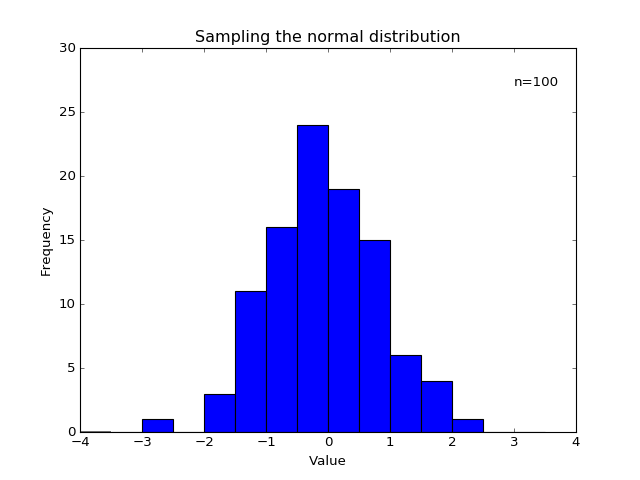

In [49]:
fig = plt.figure()
a = animation.FuncAnimation(fig,update,interval=100) # 100 ms
    # Set to variable a so the function knows how to stop the animation

`FuncAnimation` is a subclass of `animation`, which has a function that allows you to save the animation to file. That is convenient. 

Try a more advanced animation.

* Four subplots (I'm going to just start with two)
* Gamma, normal, Poisson, random

In [50]:
n = 100 # cutoff
x_norm = np.random.normal(100,20,n)
x_poiss = np.random.poisson(100,n)

Start by making the dual histogram subplot

In [14]:
plt.subplots?

<IPython.core.display.Javascript object>


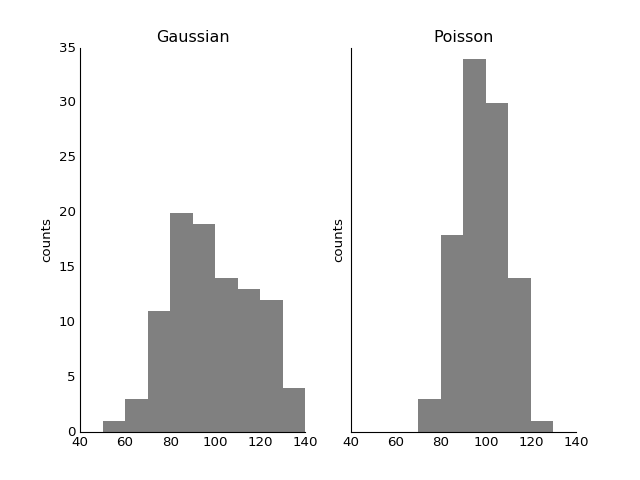

In [51]:
bins = np.arange(40,150,10)

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True)
ax1.hist(x_norm,bins=bins,facecolor='gray',edgecolor='none')
ax2.hist(x_poiss,bins=bins,facecolor='gray',edgecolor='none')


for ax in [ax1,ax2]: 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(
        bottom=False,
        top=False,
        right='off',
        left='off',
        labelleft='on',
        labelbottom='on')
    ax.set_xlim([40,140])
    ax.set_ylim([0,35])
    ax.set_ylabel('counts')
ax1.set_title('Gaussian')
ax2.set_title('Poisson')

plt.show()

Now make an animation

In [52]:
def update(curr):
    # Is the current frame at the end of the list? If so, stop
    if curr == n: 
        a.event_source.stop()  # animation will be called `a`
    plt.cla()                  # clear axes

    bins = np.arange(40,150,10)    
    ax1.hist(x_norm[:curr],bins=bins,facecolor='pink',edgecolor='none')
    ax2.hist(x_poiss[:curr],bins=bins,facecolor='pink',edgecolor='none')

    for ax in [ax1,ax2]: 
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(
            bottom=False,
            top=False,
            right='off',
            left='off',
            labelleft='on',
            labelbottom='on')
        ax.set_xlim([40,140])
        ax.set_ylim([0,35])
        ax.set_ylabel('counts')
    ax1.set_title('Gaussian')
    ax2.set_title('Poisson')

<IPython.core.display.Javascript object>


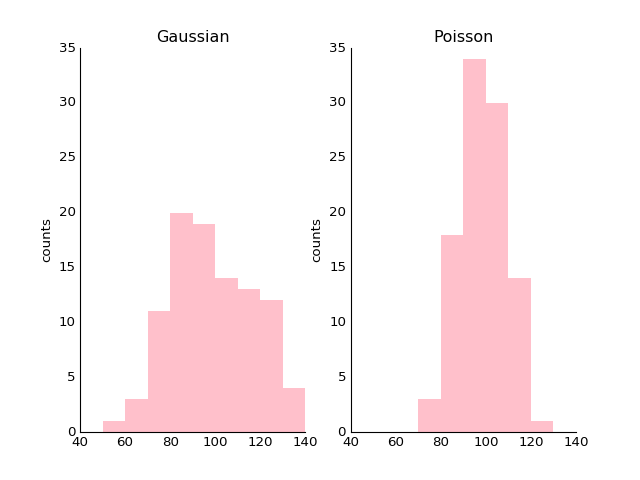

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True)
a = animation.FuncAnimation(fig,update,interval=100) # 100 ms
    # Set to variable a so the function knows how to stop the animation

# Interactivity

Interactivity and animation are similar in matplotlib, but interactivity requires going down to the canvas object of the current layer, which handles the drawing objects.

Focused on events: a piece of data associated with a function call. When the event happens, matplotlib's backend will call the function with the relevant data.

<IPython.core.display.Javascript object>


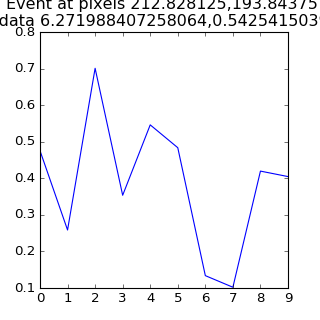

7

In [59]:
plt.figure(figsize=(4,4))
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} {} and data {},{}'.format(event.x,event.y,'\n',event.xdata,event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

The most common is the "click" event, which is a response to someone clicking on the figure. 

In [55]:
import pandas as pd

In [60]:
from random import shuffle
origins = ['China','Brazil','India','USA','Canada',
           'UK','Germany','Iraq','Chile','Mexico']
shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10), 
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.041758,Canada,0.301285
1,0.040919,China,0.679138
2,0.515731,UK,0.798556
3,0.627163,Chile,0.506046
4,0.179540,Germany,0.452663
5,0.752747,Mexico,0.653456
6,0.989320,USA,0.337840
7,0.740237,Iraq,0.693583
8,0.217053,India,0.056112
9,0.792901,Brazil,0.558509


Create a scatter plot

<IPython.core.display.Javascript object>


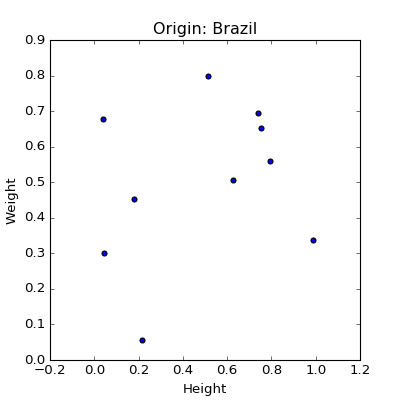

In [61]:
plt.figure(figsize=(5,5))
plt.scatter(df['height'], df['weight'], picker = 5)
# Can click up to 5 pixels away
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

Now create an update function for when I click on the figure.

In [62]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Origin: {}'.format(origin))
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7